In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import stats

In [2]:
data_file0 = "./flat_5s_test.FIT"
data_file1 = "./flat_5s_2_test.FIT"
data_file2 = "./bias_3.FIT"
data_file3 = "./bias_2.FIT"

my_fits_file0 = fits.open(data_file0)
my_fits_file1 = fits.open(data_file1)
my_fits_file2 = fits.open(data_file2)
my_fits_file3 = fits.open(data_file3)

my_fits_file0.info()
my_fits_file1.info()
my_fits_file2.info()
my_fits_file3.info()

my_fits_file0[0].scale('int64','bzero')
my_fits_file1[0].scale('int64','bzero')
my_fits_file2[0].scale('int64','bzero')
my_fits_file3[0].scale('int64','bzero')

flat1 = my_fits_file0[0].data
flat2 = my_fits_file1[0].data
bias1 = my_fits_file2[0].data
bias2 = my_fits_file3[0].data


Filename: ./flat_5s_test.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./flat_5s_2_test.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./bias_3.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   
Filename: ./bias_2.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   


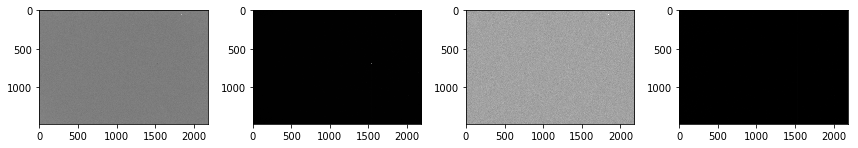

In [3]:
fig, ax = plt.subplots(1,4)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(flat1-flat2, cmap=plt.cm.gray)
ax[1].imshow(flat2, cmap=plt.cm.gray)
ax[2].imshow(bias1-bias2, cmap=plt.cm.gray)
ax[3].imshow(bias2, cmap=plt.cm.gray)

In [9]:
f1m,f1std = flat1.mean(), flat1.std()
f1m,b1m,b1std,f1std

(1736.8613215928094, 1061.0247290074055, 18.066475973820666, 71.8427228826452)

In [10]:
f2m,f2std = flat2.mean(), flat2.std()

In [11]:
b1m,b1std = bias1.mean(), bias1.std()
b1std

18.066475973820666

In [12]:
b2m,b2std = bias2.mean(), bias2.std()
f1m,f2m,b1m,b2m

(1736.8613215928094, 2202.333746727684, 1061.0247290074055, 1060.8107639925745)

In [13]:
varianceflat=((flat1-flat2).std())**2
(flat1-flat2).std()

41.59337782595028

In [14]:
variancebias=((bias1-bias2).std())**2
(bias1-bias2).std()

14.375429413632352

# Gain

In [15]:
gain = ((f1m + f2m)-(b1m + b2m)) / (varianceflat-variancebias)
print("The gain is {0:f}".format(gain))

The gain is 1.192997


# Readnoise

In [16]:
readnoise = (gain*(variancebias**(1/2)))/ (2**(1/2))

In [17]:
print("Readnoise is {0:f} in ADU".format(readnoise))
print("Readnoise is {0:f} in electrons".format(readnoise*gain))

Readnoise is 12.126773 in ADU
Readnoise is 14.467206 in electrons


# Linearity

In [18]:
lineardatafile1 = "./1.5_sec.FIT"
lineardatafile2 = "./3_sec.FIT"
lineardatafile3 = "./6_sec.FIT"
lineardatafile4 = "./12_sec.FIT"
lineardatafile5 = "./15_sec.FIT"
lineardatafile6 = "./18_sec.FIT"
lineardatafile7 = "./24_sec.FIT"
lineardatafile8 = "./30_sec.FIT"
lineardatafile9 = "./36_sec.FIT"
lineardatafile10= "./42_sec.FIT"
lineardatafile11= "./48_sec.FIT"
lineardatafile12= "./54_sec.FIT"
lineardatafile13= "./60_sec.FIT"
lineardatafile14= "./80_sec.FIT"


my_fits1 = fits.open(lineardatafile1)
my_fits2 = fits.open(lineardatafile2)
my_fits3 = fits.open(lineardatafile3)
my_fits4 = fits.open(lineardatafile4)
my_fits5 = fits.open(lineardatafile5)
my_fits6 = fits.open(lineardatafile6)
my_fits7 = fits.open(lineardatafile7)
my_fits8 = fits.open(lineardatafile8)
my_fits9 = fits.open(lineardatafile9)
my_fits10= fits.open(lineardatafile10)
my_fits11= fits.open(lineardatafile11)
my_fits12= fits.open(lineardatafile12)
my_fits13= fits.open(lineardatafile13)
my_fits14= fits.open(lineardatafile14)


flats1 = my_fits1[0].data.mean()
flats2 = my_fits2[0].data.mean()
flats3 = my_fits3[0].data.mean()
flats4 = my_fits4[0].data.mean()
flats5 = my_fits5[0].data.mean()
flats6 = my_fits6[0].data.mean()
flats7 = my_fits7[0].data.mean()
flats8 = my_fits8[0].data.mean()
flats9 = my_fits9[0].data.mean()
flats10= my_fits10[0].data.mean()
flats11= my_fits11[0].data.mean()
flats12= my_fits12[0].data.mean()
flats13= my_fits13[0].data.mean()
flats14= my_fits14[0].data.mean()

In [19]:
x = (1.5,3,6,12,15,18,24,30,36,42,48,54,60,80)
y = (flats1,flats2,flats3,flats4,flats5,flats6,flats7,flats8,flats9,flats10,flats11,flats12,flats13,flats14)

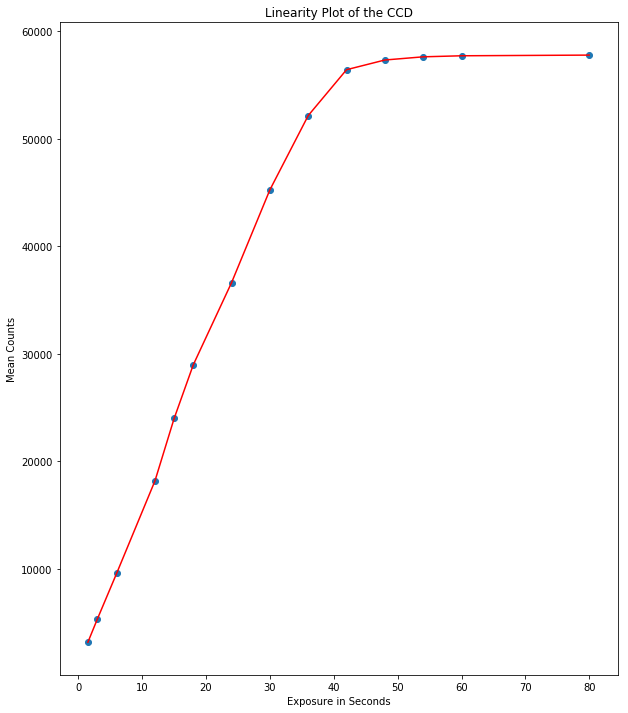

In [20]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,12)



ax.plot(x,y,c='r')
ax.scatter(x,y)
ax.set_title("Linearity Plot of the CCD")
ax.set_ylabel("Mean Counts")
ax.set_xlabel("Exposure in Seconds");
fig.savefig('Linearity.png')

In [21]:
t = 300
g = 2
R = 6
SB = 604*2
dc = 10/3600
S = 6487*2
ns = 3.14*((30**2)-(20**2))
nl = 3.14*(5**2)

answer = (S/((S + nl*(1+(nl/ns))*(SB + t + dc + R**2))**(1/2)))
answer

34.64498476273068

In [22]:
df = pd.DataFrame( columns=['Exposure Time(Sec)', 'Mean Counts'])
df['Exposure Time(Sec)'] = x
df['Mean Counts'] = y
df

,Exposure Time(Sec),Mean Counts
0,1.5,3174.873510
1,3.0,5353.182539
2,6.0,9578.537012
3,12.0,18178.722682
4,15.0,23983.323802
5,18.0,28975.716336
6,24.0,36629.318385
7,30.0,45259.308315
8,36.0,52164.646178
9,42.0,56429.005788


In [23]:
print(df[0:14].to_latex(index=False))

\begin{tabular}{rr}
\toprule
 Exposure Time(Sec) &   Mean Counts \\
\midrule
                1.5 &   3174.873510 \\
                3.0 &   5353.182539 \\
                6.0 &   9578.537012 \\
               12.0 &  18178.722682 \\
               15.0 &  23983.323802 \\
               18.0 &  28975.716336 \\
               24.0 &  36629.318385 \\
               30.0 &  45259.308315 \\
               36.0 &  52164.646178 \\
               42.0 &  56429.005788 \\
               48.0 &  57330.156085 \\
               54.0 &  57626.195524 \\
               60.0 &  57723.531514 \\
               80.0 &  57786.300762 \\
\bottomrule
\end{tabular}



In [24]:
from scipy.optimize import curve_fit

In [25]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

In [26]:
t_kel = t_cel + 273.15

In [27]:
electrons = adu * 2.3

In [28]:
electrons_per_sec = electrons / 120

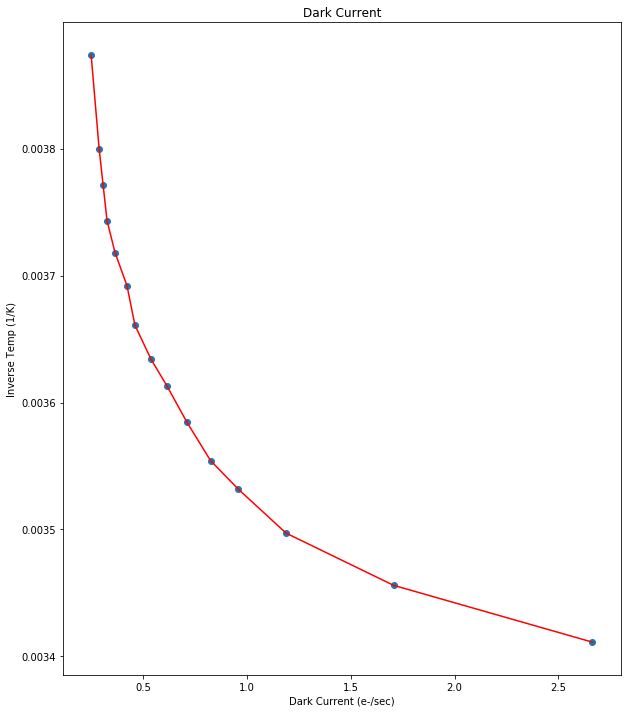

In [29]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,12)



ax.plot(electrons_per_sec,(1/t_kel),c='r')
ax.scatter(electrons_per_sec,(1/t_kel))
ax.set_title("Dark Current")
ax.set_ylabel("Inverse Temp (1/K)")
ax.set_xlabel("Dark Current (e-/sec)");
fig.savefig('Dark Current.png')

In [30]:
k_b = 8.6175e-5

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

In [31]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

In [32]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

In [34]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)

77098901498.76268
1.2205226787341208


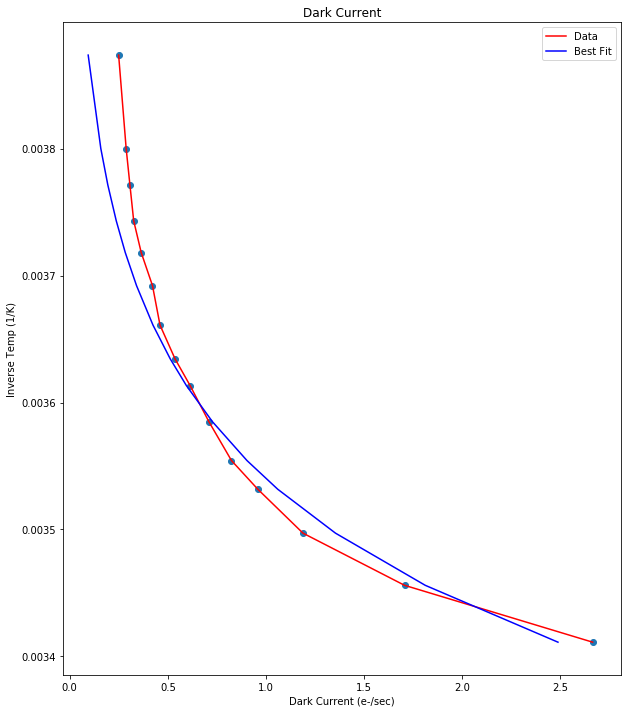

In [37]:
fit = dark_current(t_kel,alpha_fit,e_g_fit)
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,12)

ax.plot(electrons_per_sec,(1/t_kel),c='r',label = "Data")
ax.scatter(electrons_per_sec,(1/t_kel))
ax.plot(fit,(1/t_kel),c='b', label = "Best Fit")
ax.set_title("Dark Current")
ax.set_ylabel("Inverse Temp (1/K)")
ax.set_xlabel("Dark Current (e-/sec)");
ax.legend()
fig.savefig('Dark Current.png')

In [36]:
D1 =  alpha_fit * np.exp(-e_g_fit / (2 * k_b * 273))
D1

0.4182142480369458